# Map by Folium 

Folium is a Python library used for visualizing geospatial data. It is easy to use and yet a powerful library. Begin by importing the necessary packages including geopandas to import the vector data and folium to create the interactive map.
In this project l have collected two source data. One of is statistic information about country and another is country's border. Then combine over one data and created map. For this aim l have used some title for background, some statistic data 2020.

## Imports

In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import json
from shapely.geometry import Polygon, Point, shape, mapping
from shapely.ops import transform

from branca.element import Figure
import folium
import folium.plugins as plugins
from IPython.display import IFrame

## Load

<AxesSubplot:>

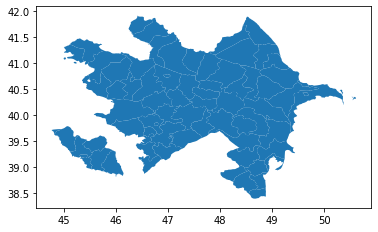

In [2]:
# Load SHP data
BorderAZ = gpd.read_file('AZE_adm2.shp')

# Display Map
BorderAZ.plot()

In [3]:
# Length of features data
len(BorderAZ)

73

In [4]:
#Load Statictical data
AZE = pd.read_csv('AZE_stat_2020.csv')
AZE.head()

,Id,Name-ENG,People,Ha,year,Move
0,1,Agstafa,88.5,17659,2020,NaN
1,2,Shamkir,219.5,40664,2020,NaN
2,3,Dashkasan,35.4,1741,2020,Baki
3,4,Gadabay,100.9,13244,2020,NaN
4,5,Ganja city,335.6,114,2020,NaN


In [5]:
# Get unique names for each data
azeset = set(AZE['Name-ENG'].unique())
borderset = set(BorderAZ['VARNAME_2'].unique())

In [6]:
# Replace name for same common names.
geodata = BorderAZ.rename(columns={'VARNAME_2': 'NAME'})
data = AZE.rename(columns={'Name-ENG': 'NAME'})
data

,Id,NAME,People,Ha,year,Move
0,1,Agstafa,88.5,17659,2020,NaN
1,2,Shamkir,219.5,40664,2020,NaN
2,3,Dashkasan,35.4,1741,2020,Baki
3,4,Gadabay,100.9,13244,2020,NaN
4,5,Ganja city,335.6,114,2020,NaN
...,...,...,...,...,...,...
68,74,Fizuli,133.8,46862,2020,NaN
69,75,Khankendy city,55.9,995,2020,NaN
70,76,Tartar,104.7,25573,2020,Baki
71,78,Khojali,28.8,2880,2020,NaN


In [7]:
# Intersect both data
commons = azeset.intersection(borderset)

In [8]:
# create geodata dataframe which check data names same with id
geo_filt = geodata[geodata['NAME'].isin(commons)]
data_filt = data[data['NAME'].isin(commons)]

In [9]:
# Combine dataframes and remove useless features
geo_data = eval(geo_filt[['NAME', 'geometry']].dropna().to_json())

In [10]:
# Merged commons features and create one
merged = geodata.merge(data, left_on='ID_2', right_on='Id')
merged.head(2)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,NAME_x,lat,lon,geometry,Id,NAME_y,People,Ha,year,Move
0,17,AZE,Azerbaijan,1,Ganja-Qazakh,1,Ağstafa,Rayon,District,None,Agstafa,41.260041,45.463790,"POLYGON ((45.37991 41.01940, 45.38065 41.03189...",1,Agstafa,88.5,17659,2020,NaN
1,17,AZE,Azerbaijan,1,Ganja-Qazakh,2,Şəmkir,Rayon,District,None,Shamkir,40.849372,46.037658,"POLYGON ((45.91169 40.55718, 45.90580 40.56162...",2,Shamkir,219.5,40664,2020,NaN


In [11]:
# Identify coordinate system of are. it is use EPSG:4326 beacuse of location is WGS-84
geodata.crs = "EPSG:4326"

In [12]:
# Define map area
fig2=Figure(width=1500,height=900)
map1 = folium.Map([40.1, 49], tiles='cartodbpositron', zoom_start=8,)
fig2.add_child(map1)

# Create full screen
plugins.Fullscreen(position='bottomright').add_to(map1)
draw = plugins.Draw(export=True)# add draw tools to map
draw.add_to(map1)


# Prepare used data
features = data[['NAME','Ha','People']]
tooltip = "Click me!"

# Create tiles (background)
tiles = ['cartodbpositron','CartoDB Dark_Matter', 'openstreetmap','stamenwatercolor', 'stamenterrain','Stamen Toner',]

for tile in tiles:
    folium.TileLayer(tile).add_to(map1)
    
# Add center of region lacation to the map
for idx, count in merged.iterrows():
    folium.Marker(location=(count['lat'], count['lon']),tooltip=tooltip, 
                  popup=('Population: ' , count['People'])).add_to(map1)

# Create choropleth map
choropleth = folium.Choropleth(
    geo_data = geodata, # dataframe
    name = 'choropleth', # Map type
    data = features, # data 
    columns = ['NAME', 'Ha'], # features
    key_on = "feature.properties.NAME", # Map visualize name
    fill_color = 'YlGn', # color type
    fill_opacity = 0.7,
    line_opacity = 0.5,
    legend_name = 'Sow area by region, 2020',
    highlight = True # Diplay name
).add_to(map1)


plt.show()

folium.LayerControl().add_to(map1)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['NAME'], labels=False))
        
    
map1

# Save map as HTML
map1.save('Azerbaijan_Sow_area_people_2020.html')
IFrame('Azerbaijan_Sow_area_people_2020.html', width=1000, height=1000)